# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

Исследование объявлений о продаже квартир

Необходимо оценить данные о продаже квартир в Ленинградской области, выявить факторы влияющие на стоимость, установить взаимосвязи между параметрами и ценой. Подробно детали объясняютс в каждом пункте исследования

описание данных:
Набор данных из 23699 строк и 22 столбцов
Описание данных
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
balcony — число балконов
ceiling_height — высота потолков (м)
cityCenters_nearest — расстояние до центра города (м)
days_exposition — сколько дней было размещено объявление (от публикации до снятия)
first_day_exposition — дата публикации
floor — этаж
floors_total — всего этажей в доме
is_apartment — апартаменты (булев тип)
kitchen_area — площадь кухни в квадратных метрах (м²)
last_price — цена на момент снятия с публикации
living_area — жилая площадь в квадратных метрах (м²)
locality_name — название населённого пункта
open_plan — свободная планировка (булев тип)
parks_around3000 — число парков в радиусе 3 км
parks_nearest — расстояние до ближайшего парка (м)
ponds_around3000 — число водоёмов в радиусе 3 км
ponds_nearest — расстояние до ближайшего водоёма (м)
rooms — число комнат
studio — квартира-студия (булев тип)
total_area — общая площадь квартиры в квадратных метрах (м²)
total_images — число фотографий квартиры в объявлении

Основные этапы:
1. Изучение данных
2. Предобработка данных:
    работа с пропусками
    изменение типов данных
    работа с дубликатами
3. Добавление новых данных (при необходимости), категоризация
4. Исследовательский анализ
5. Подготовка выводов и рекомендаций

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt

/tmp/ipykernel_147/1511048276.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was too old on your system - pyarrow 10.0.1 is the current minimum supported version as of this release.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


В инструкции указание построить гистограммы для всех числовых столбцов. 
Не понимаю практической пользы делать это именно в этой части, все графики ниже в соответствующих частях работы.

### Выполните предобработку данных

Будем проверять столбцы, в которых нашли пропуски.

Оценим, как много пропущеных значений по каждому столбцу, для этого выведем значения в процентах и построим график процентного выражения пропусков по каждому столбцу.

In [5]:
# после обработки повторим эту проверку, поэтому создаем переменную
null_percentage =(data.isnull().mean()*100).sort_values(ascending=False)
null_percentage

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
ponds_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
last_price               0.000000
total_images             0.000000
studio                   0.000000
floor                    0.000000
open_plan                0.000000
dtype: float64

<AxesSubplot:>

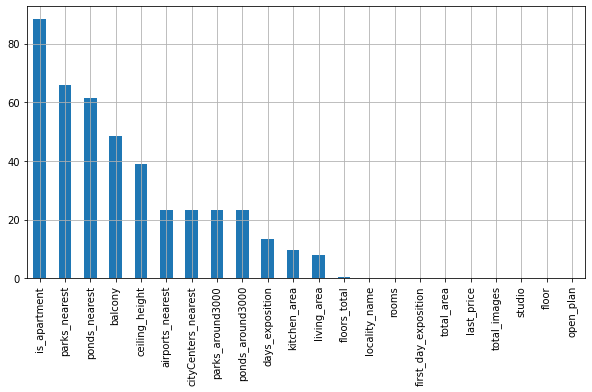

In [6]:
null_percentage.plot(kind='bar', figsize=(10, 5), grid=True)

В данных очень много пропусков, в пяти столбцах выше 38%, соответственно, необходимо детально рассмотреть каждый проблемный столбец

In [7]:
# приведем названия столбов в соответствие snake_style, и заранее оговоримся,
# что в поле количество парков и прудов поблизости рассматривается только область радиусом около 3км
data.rename(columns = {'cityCenters_nearest':'city_centers_nearest', 'parks_around3000':'parks_around', 'ponds_around3000': 'ponds_around'  }, inplace = True )

In [8]:
# посмотрим на колонку с наибольшим количеством пропусков
data['is_apartment'].value_counts(dropna=False)

is_apartment
NaN      20924
False     2725
True        50
Name: count, dtype: int64

Данные пропуски скорее всего возникли, так как поле не обязательно для заполнения. До сих пор в законодательстве не определено понятие "апартаменты". Так называют комерческую недвижимость.

Соотношение ~ 0.2% от общего количества объявлений совсем не похоже на правду. 
Заменять значения NaN, например на False не будем, так как это сильно изменит соотношение по заполненным данным. 
Соотношение апартаментов к объектам, где указан тип недвижимости 1.8%.

Далее рассмотрим столбцы с гео данными

Вероятно, данные по географии не были выгружены, так как данные пытались найти в определенном радиусе. Если не нашлось ни парка ни пруда ни аэропорта, то указать в конкретной ячейке было просто нечего.
 * 17  parks_around
 * 18  parks_nearest
 * 19  ponds_around
 * 20  ponds_nearest  

Так как пруды и парки для наших целей не самые главные данные и не фигурируют в задачах, а также тех значений, что есть в выборке достаточно, чтобы сделать срез и провести исследование, предлагаю оставить их как есть.

перед геоданными по аэропорту и центру посмотрим на населенные пункты

In [9]:
data.locality_name.isna().sum()

49

пропусков мало, влияние на анализ они окажут незначительное. Считаю правильным решением удалить пропуски.

In [10]:
data = data.dropna(subset=['locality_name'])

In [11]:
# выведем уникальные значения
set(data['locality_name'].unique())

{'Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [ ]:
# обработаем неявные дубликаты
data.loc[:, 'locality_name'] = data['locality_name'].str.lower()
data.loc[:, 'locality_name'] = data['locality_name'].str.strip()
data.loc[:, 'locality_name'] = data['locality_name'].str.replace('поселок', 'посёлок')
data.loc[:, 'locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'посёлок')
data.loc[:, 'locality_name'] = data['locality_name'].str.replace('посёлок городского типа', 'посёлок')
data.loc[:, 'locality_name'] = data['locality_name'].str.replace('городской поселок', 'посёлок')

In [ ]:
data.loc[data['locality_name'].str.contains('рябово') & data['locality_name'].notna(), 'locality_name']

1611     посёлок рябово
3930     поселок рябово
6465     посёлок рябово
11118    поселок рябово
Name: locality_name, dtype: object

В столбцах с расстянием до аэропорта и центра города можно попробовать найти недостающие значения с помощью внешних данных

In [14]:
data['airports_nearest'].value_counts(dropna=False)
data['city_centers_nearest'].value_counts(dropna=False)

city_centers_nearest
NaN        5511
8460.0       61
20802.0      32
10720.0      30
8434.0       27
           ... 
14535.0       1
14822.0       1
19433.0       1
8337.0        1
12549.0       1
Name: count, Length: 7628, dtype: int64

Большая доля значений пропущена - попробуем восстановить данные из внешнего источника. 

In [15]:
# создадим датафрейм, в котором будут только уникальные названия населенных пунктов
# (по строкам, где отсутствуют значения) и добавим для точности дальнейшего поиска область
nan_list = pd.DataFrame(data.loc[data['airports_nearest'].isnull(), 'locality_name'].unique(), columns=['address'])
nan_list = nan_list.dropna().reset_index(drop=True)
nan_list['address'] = nan_list['address'].astype(str).apply(lambda x: 'Ленинградская область, ' + x)
nan_list

,address
0,"Ленинградская область, городской посёлок янино-1"
1,"Ленинградская область, посёлок мурино"
2,"Ленинградская область, сертолово"
3,"Ленинградская область, деревня кудрово"
4,"Ленинградская область, коммунар"
...,...
306,"Ленинградская область, деревня нижняя"
307,"Ленинградская область, коттеджный посёлок лесное"
308,"Ленинградская область, деревня тихковицы"
309,"Ленинградская область, деревня борисова грива"


всего 311 строк - для внешнего поиска это многообщеающе, не займет слишком много времени и ресурсов

In [16]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


Найдем гео данные для населенных пунктов, координаты и расстояния, дополнительно укажем ограничение по широте и долготе (возьмем значения немного за границами Лен области), чтобы исключить ошибки поиска по названию.

In [18]:
from geopandas.tools import geocode

def get_geocode(address):
    try:
        result = geocode(address)
        if not result.empty:
            latitude = result.geometry.y
            longitude = result.geometry.x
            if 58.4 < float(latitude.iloc[0]) < 61.35 and 26.4 < float(longitude.iloc[0]) < 35.8:                
                return pd.Series({'latitude': latitude, 'longitude': longitude})
            else:
                return pd.Series({'latitude': None, 'longitude': None})
        else:
            return pd.Series({'latitude': None, 'longitude': None})
    except:
        return pd.Series({'latitude': None, 'longitude': None})

nan_list[['latitude', 'longitude']] = nan_list['address'].apply(lambda x: get_geocode(x))
nan_list['latitude'] = nan_list['latitude'].apply(lambda x: x.values[0] if x is not None else None)
nan_list['longitude'] = nan_list['longitude'].apply(lambda x: x.values[0] if x is not None else None)
nan_list['coordinates'] = nan_list.apply(lambda row: f"({row['latitude']}, {row['longitude']})", axis=1)
nan_list

,address,latitude,longitude,coordinates
0,"Ленинградская область, городской посёлок янино-1",59.947418,30.561453,"(59.947418, 30.561453)"
1,"Ленинградская область, посёлок мурино",60.045763,30.450481,"(60.0457627, 30.4504814)"
2,"Ленинградская область, сертолово",60.143707,30.207806,"(60.143707, 30.207806)"
3,"Ленинградская область, деревня кудрово",59.908391,30.512608,"(59.9083906, 30.5126078)"
4,"Ленинградская область, коммунар",59.622195,30.391922,"(59.6221955, 30.3919223)"
...,...,...,...,...
306,"Ленинградская область, деревня нижняя",59.701123,29.849491,"(59.7011231, 29.8494914)"
307,"Ленинградская область, коттеджный посёлок лесное",NaN,NaN,"(nan, nan)"
308,"Ленинградская область, деревня тихковицы",59.418755,29.954121,"(59.4187553, 29.954121)"
309,"Ленинградская область, деревня борисова грива",60.096816,30.965122,"(60.0968163, 30.9651221)"


In [19]:
# Нашли почти все, уберем пропуски и выведем описание получившегося набора данных
nan_list = nan_list.dropna().reset_index(drop=True)
nan_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   address      297 non-null    object 
 1   latitude     297 non-null    float64
 2   longitude    297 non-null    float64
 3   coordinates  297 non-null    object 
dtypes: float64(2), object(2)
memory usage: 9.4+ KB


In [20]:
# В Ленинградской области один аэропорт и множество аэродромов и вертодромов.
# Для нашей задачи нам нужен именно аэропорт, поэтому будем считать расстояния до аэропорта Пулково(1,2 не разделяем)
# В качестве центра города будем использовать координаты Гостиного Двора (в Центральном районе), в любом случае такие значения будут гораздо полезнее чем пропуски.

from geopy.geocoders import Nominatim
custom_user_agent = "my-geocoding-application"
nom = Nominatim(user_agent=custom_user_agent)

airport_raw= nom.geocode('Аэропорт Пулково')
airport_latitude, airport_longitude = round(airport_raw.latitude, 6), round(airport_raw.longitude, 6)
airport_coordinates = (airport_latitude, airport_longitude)
center_raw= nom.geocode('Большой Гостиный Двор')
center_latitude, center_longitude = round(center_raw.latitude, 6), round(center_raw.longitude, 6)
center_coordinates = (center_latitude, center_longitude)
print(airport_coordinates, center_coordinates)

(59.801699, 30.267601) (59.933102, 30.33218)


In [21]:
# посчитаем расстояния и добавим значения в датафрейм

from geopy.distance import geodesic

def calculate_distance(coords, point):
    return round(geodesic(coords, point).meters)

nan_list['airport_nearest_new'] = nan_list['coordinates'].apply(lambda x: calculate_distance(eval(x), airport_coordinates))
nan_list['city_centers_nearest_new'] = nan_list['coordinates'].apply(lambda x: calculate_distance(eval(x), center_coordinates))
nan_list

,address,latitude,longitude,coordinates,airport_nearest_new,city_centers_nearest_new
0,"Ленинградская область, городской посёлок янино-1",59.947418,30.561453,"(59.947418, 30.561453)",23118,12915
1,"Ленинградская область, посёлок мурино",60.045763,30.450481,"(60.0457627, 30.4504814)",29051,14183
2,"Ленинградская область, сертолово",60.143707,30.207806,"(60.143707, 30.207806)",38250,24467
3,"Ленинградская область, деревня кудрово",59.908391,30.512608,"(59.9083906, 30.5126078)",18161,10461
4,"Ленинградская область, коммунар",59.622195,30.391922,"(59.6221955, 30.3919223)",21187,34800
...,...,...,...,...,...,...
292,"Ленинградская область, посёлок пчевжа",59.565868,32.107174,"(59.565868, 32.107174)",106901,107849
293,"Ленинградская область, деревня нижняя",59.701123,29.849491,"(59.7011231, 29.8494914)",26039,37435
294,"Ленинградская область, деревня тихковицы",59.418755,29.954121,"(59.4187553, 29.954121)",46187,61133
295,"Ленинградская область, деревня борисова грива",60.096816,30.965122,"(60.0968163, 30.9651221)",50996,39736


In [22]:
# Посмотрим, что получилось
nan_list.describe()

,latitude,longitude,airport_nearest_new,city_centers_nearest_new
count,297.000000,297.000000,297.000000,297.000000
mean,59.864960,30.343484,70207.858586,71393.649832
std,0.500766,1.188875,51526.646305,49597.460478
min,58.571579,28.086979,5925.000000,10461.000000
25%,59.541278,29.713661,32356.000000,36945.000000
50%,59.756936,30.170296,51987.000000,57687.000000
75%,60.129581,30.727077,99760.000000,95810.000000
max,61.113167,35.476959,317229.000000,307479.000000


Выглядит приемлемо (с запада на восток Лен область 500 км, а с севера на юг 320 км. - наши значения вписываются в рамки), заполним полученные значения в пропуски по столбцам аэропорт и центр города и оценим результат

In [23]:
nan_list['address'] = nan_list['address'].str.replace('Ленинградская область, ', '')
locality_to_address = nan_list.set_index('address')['airport_nearest_new'].to_dict()
center_to_center = nan_list.set_index('address')['city_centers_nearest_new'].to_dict()

data.loc[:, 'airports_nearest'] = data['airports_nearest'].fillna(data['locality_name'].map(locality_to_address))
data.loc[:, 'city_centers_nearest'] = data['city_centers_nearest'].fillna(data['locality_name'].map(center_to_center))

data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment            20890
studio                      0
open_plan                   0
kitchen_area             2269
balcony                 11513
locality_name               0
airports_nearest           88
city_centers_nearest       89
parks_around             5510
parks_nearest           15586
ponds_around             5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

Осталось около 100 пропусков по обоим столбцам, приемлемый результат для дальнейшей работы

Перейдем к балконам

Обычно в описании жилья указывают наличие балкона. Скорее всего, там где ничего не указано, балкона нет. Поэтому заменим отсутствующие значения на ноль

In [24]:
data.loc[:, 'balcony'] = data['balcony'].fillna(0)

In [25]:
# изменим формат на целочисленный и проверим результат 
data.loc[:, 'balcony'] = data['balcony'].astype('int')
data['balcony'].value_counts(dropna=False)


balcony
0.0    15238
1.0     4187
2.0     3658
5.0      304
4.0      182
3.0       81
Name: count, dtype: int64

Высота потолков весомый параметр и отсутствие почти половины значений мы допустить не можем. Зададим вопрос коллегам, а пока возьмем медианное значение и заполним пропуски. После проверим, что пропусков не осталось

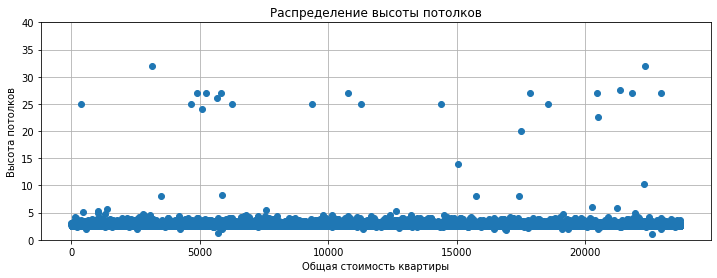

In [26]:
data['ceiling_height'].plot(
    ylim=(0, 40),
    style='o',
    grid=True,
    figsize=(12, 4),
) 
plt.title('Распределение высоты потолков')
plt.xlabel('Общая стоимость квартиры')
plt.ylabel('Высота потолков')
plt.show()

Некоторые значения выбиваются из понятие высота потолков - можно предположить, что при заполнении не поставили запятую. Потолки в 5-8 метров высотой редкость, но они точно есть в центре Санкт-Петербурга. 25-30 метров выглядит, как потолок на спортивной арене. Попробуем обновить данные, которые больше 10 и еще раз посмотрим на график.

In [27]:
data.loc[:, 'ceiling_height'] = data['ceiling_height'].apply(lambda x: x / 10 if x >= 10 else x)

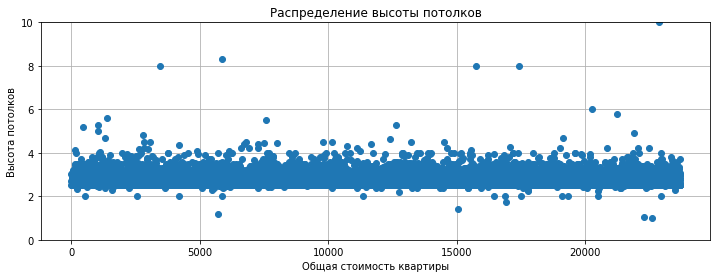

In [28]:
data['ceiling_height'].plot(
    ylim=(0, 10),
    style='o',
    grid=True,
    figsize=(12, 4),
)
plt.title('Распределение высоты потолков')
plt.xlabel('Общая стоимость квартиры')
plt.ylabel('Высота потолков')
plt.show()

In [29]:
data['ceiling_height'].max()

10.0

Максимальное значение 8.3 метра, и таких необычных для не жителей Питера значений не много. Можем переходить к следующему шагу, а именно заполним пропуски медианным значением

In [30]:
data.loc[:, 'ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].value_counts(dropna=False)


ceiling_height
2.65    9836
2.50    3522
2.60    1646
2.70    1580
3.00    1109
        ... 
3.42       1
3.59       1
3.88       1
1.75       1
4.25       1
Name: count, Length: 176, dtype: int64

столбец всего этажей

In [31]:
data[data['floors_total'].isna()]


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,0.0,санкт-петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,санкт-петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,санкт-петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,...,NaN,0.0,санкт-петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,санкт-петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,NaN,...,23.60,0.0,санкт-петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


В колонке "Всего этажей в доме" отсутствует 0,36% значений - в общей картине не сильно значимо. Заполнять не будем, так как среднее/медианное значение может оказаться меньше, чем этаж самого объекта.


Далее рассмотрим срок размещения

In [32]:
data['days_exposition'].isnull().sum()
data['days_exposition'].value_counts(dropna=False)

days_exposition
NaN       3180
45.0       879
60.0       538
7.0        234
30.0       208
          ... 
1045.0       1
957.0        1
1268.0       1
963.0        1
890.0        1
Name: count, Length: 1142, dtype: int64

<AxesSubplot:ylabel='Frequency'>

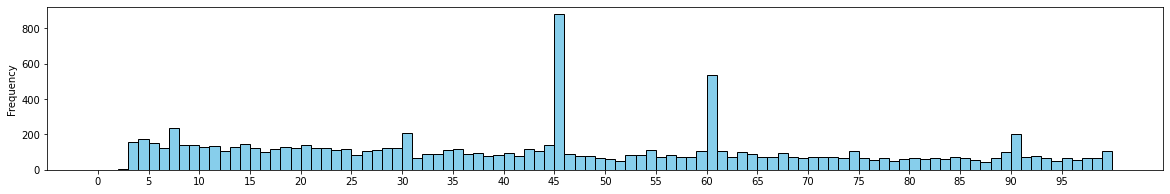

In [33]:
# Посмотрим на график по сроку размещения объявлений 
plt.xticks(range(0, 100, 5))
data['days_exposition'].plot(kind='hist', bins=100, color='skyblue', edgecolor='black', range=(0, 100), figsize=(20, 3))

Возможно объявления оставались размещенными даже после продажи объектов, отсюда возникают многолетние периоды размещения объвлений. Причины для пропусков данных определить сложно, возможно это технический сбой или ошибки в системах при обработке/передаче данных. Это значимый параметр для дальнейшего исследования - медиана или нули не подойдут в связи с огромным разбросом - можем исказить результаты наблюдений, поэтому оставляем как есть.

предположение

Замечено, что есть пики по количеству снятых объявлений на 7, 30, 45, 60 (возможно и 75, но значения не так сильно выделяются) и 90 день. Возможно есть какое-то напоминание о том, что объявление размещено. После получения такого напоминания, даже если объект продан раньше, объявление чаще снимают в эти дни.

дата первого размещения. Изменим формат данных

In [34]:
data.loc[:, 'first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around,parks_nearest,ponds_around,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07 00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04 00:00:00,1,2.65,11.0,18.6,1,NaN,...,11.0,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20 00:00:00,2,2.65,5.0,34.3,4,NaN,...,8.3,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24 00:00:00,3,2.65,14.0,NaN,9,NaN,...,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19 00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


1. Первая-итерация  - - - 
площадь кухни и жилую площадь рассмотрим вместе. данные могли не заполнять так как поле необязательное. Посчитать самостоятельно среднее/медианное/ноль не представляется возможным. Принимаем как есть

2. Вторая итерация - - - 
заполним пропуски в столбцах с площадью кухни и жилой площадью с помощью коэффициента на основании средних значений 

In [35]:
mean_living_area_ratio = (data['living_area'] / data['total_area']).mean()
mean_kitchen_area_ratio = (data['kitchen_area'] / data['total_area']).mean()

data['living_area'].fillna(data['total_area'] * mean_living_area_ratio, inplace=True)
data['kitchen_area'].fillna(data['total_area'] * mean_kitchen_area_ratio, inplace=True)

/tmp/ipykernel_147/1514408089.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['living_area'].fillna(data['total_area'] * mean_living_area_ratio, inplace=True)
/tmp/ipykernel_147/1514408089.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

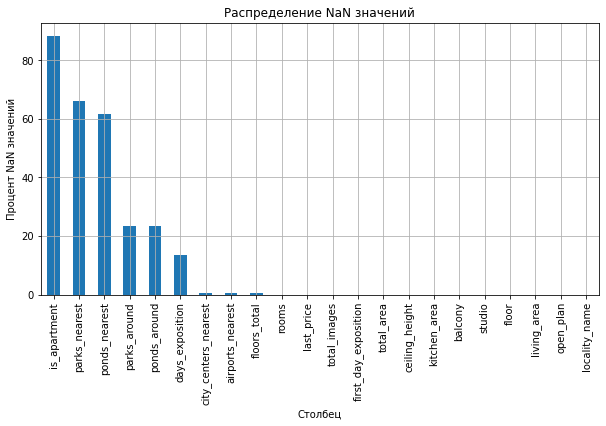

In [36]:
null_percentage =(data.isnull().mean()*100).sort_values(ascending=False)
null_percentage
null_percentage.plot(kind='bar', figsize=(10, 5), grid=True)
plt.title('Распределение NaN значений')
plt.xlabel('Столбец')
plt.ylabel('Процент NaN значений')
plt.show()

Проанализированы пропуски, там где возможно были добавлены значения (медианные/средние, из внешних источников, нули). 
Обработаны дубликаты, переименованы столбцы.
График по пропускам выглядит гораздо лучше, приступаем к следующему шагу

### Добавьте в таблицу новые столбцы

Добавляем в таблицу новые столбцы со следующими параметрами:
цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
месяц публикации объявления;
год публикации объявления;
тип этажа квартиры (значения — «первый», «последний», «другой»);
расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [41]:
data.loc[:, 'price_per_square_meter'] = (data['last_price'] / data['total_area']).round(2)
data.loc[:, 'weekday_published'] = data['first_day_exposition'].dt.weekday
data.loc[:, 'month_published'] = data['first_day_exposition'].dt.month
data.loc[:, 'year_published'] = data['first_day_exposition'].dt.year

import numpy as np

def define_floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data.loc[:, 'floor_type'] = data.apply(define_floor_type, axis=1)

data.loc[:, 'city_centers_nearest_km'] = (data['city_centers_nearest'] / 1000).round()
data.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,weekday_published,month_published,year_published,floor_type,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.00000,8,NaN,...,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.60000,1,NaN,...,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.30000,4,NaN,...,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,89.79525,9,NaN,...,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.00000,13,NaN,...,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


Осталось поработать с форматом данных

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23650 non-null  int64         
 1   last_price               23650 non-null  float64       
 2   total_area               23650 non-null  float64       
 3   first_day_exposition     23650 non-null  datetime64[ns]
 4   rooms                    23650 non-null  int64         
 5   ceiling_height           23650 non-null  float64       
 6   floors_total             23565 non-null  float64       
 7   living_area              23650 non-null  float64       
 8   floor                    23650 non-null  int64         
 9   is_apartment             2760 non-null   object        
 10  studio                   23650 non-null  bool          
 11  open_plan                23650 non-null  bool          
 12  kitchen_area             23650 non-nu

In [43]:
# для удобства приведем то, что можно к целым числам
list_to_int = ['last_price', 'floors_total', 'balcony', 'airports_nearest', 'city_centers_nearest', 'parks_around',
               'parks_nearest', 'ponds_around', 'ponds_nearest', 'days_exposition', 'price_per_square_meter', 'city_centers_nearest_km']
for column in list_to_int:
    data[column] = data[column].round().astype('Int64', errors='ignore')

# Округлим до 1 знака
list_to_float = ['total_area', 'ceiling_height', 'living_area', 'kitchen_area']
for column in list_to_float:
    data[column] = data[column].round(1)
    
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,weekday_published,month_published,year_published,floor_type,city_centers_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.7,16,51.0,8,NaN,...,482,2,755,<NA>,120370,3,3,2019,другой,16
1,7,3350000,40.4,2018-12-04,1,2.6,11,18.6,1,NaN,...,<NA>,0,<NA>,81,82921,1,12,2018,первый,19
2,10,5196000,56.0,2015-08-20,2,2.6,5,34.3,4,NaN,...,90,2,574,558,92786,3,8,2015,другой,14
3,0,64900000,159.0,2015-07-24,3,2.6,14,89.8,9,NaN,...,84,3,234,424,408176,4,7,2015,другой,7
4,2,10000000,100.0,2018-06-19,2,3.0,14,32.0,13,NaN,...,112,1,48,121,100000,1,6,2018,другой,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000,133.8,2017-03-21,3,3.7,5,73.3,3,NaN,...,796,3,381,<NA>,72491,1,3,2017,другой,4
23695,14,3100000,59.0,2018-01-15,3,2.6,5,38.0,4,NaN,...,<NA>,<NA>,<NA>,45,52542,0,1,2018,другой,53
23696,18,2500000,56.7,2018-02-11,2,2.6,3,29.7,1,NaN,...,<NA>,<NA>,<NA>,<NA>,44092,6,2,2018,первый,76
23697,13,11475000,76.8,2017-03-28,2,3.0,17,43.3,12,NaN,...,173,3,196,602,149511,1,3,2017,другой,10


### Проведите исследовательский анализ данных

Необходимо оценить следующие параметры

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка

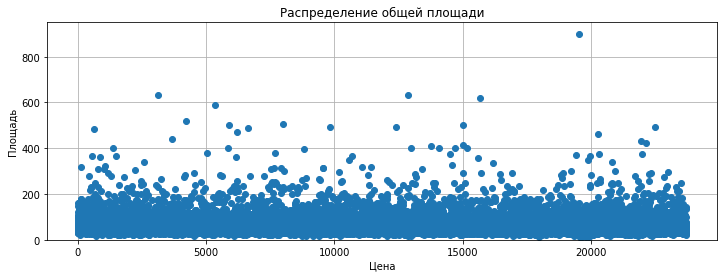

In [44]:
data['total_area'].describe().round(2)
data['total_area'].plot(
    ylim=(0, 950),
    style='o',
    grid=True,
    figsize=(12, 4),
)
plt.title('Распределение общей площади')
plt.xlabel('Цена')
plt.ylabel('Площадь')
plt.show()

Диаграмма размаха


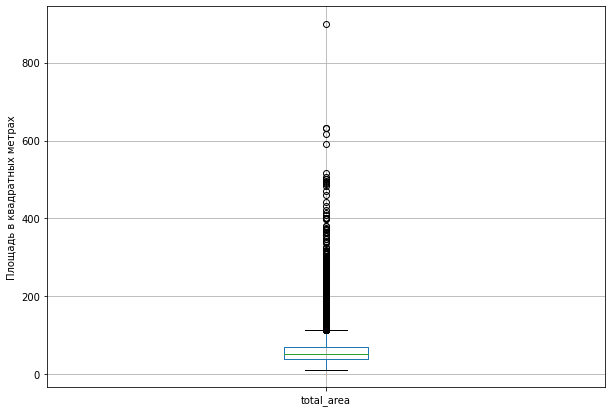

In [45]:
print('Диаграмма размаха')
data.boxplot(column=['total_area'], figsize=(10,7), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

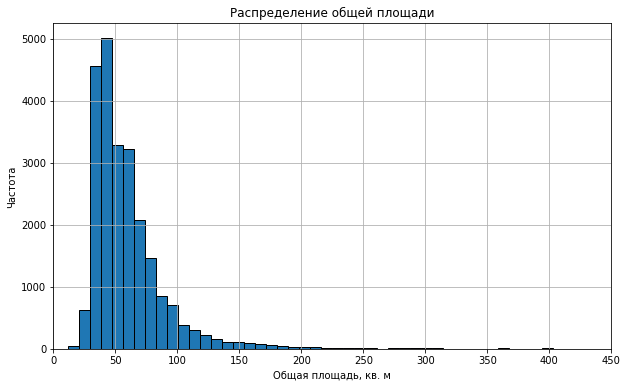

In [46]:
data['total_area'].plot(kind='hist', bins=100, edgecolor='black', figsize=(10, 6), xlim=(0, 450),)
plt.title('Распределение общей площади')
plt.xlabel('Общая площадь, кв. м')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Большая часть квартир имеет площадь от 25 до 75 метров. Распределение в целом выглядит нормально, есть выбивающиеся значения в 900 метров например, но такая недвижимость может быть.

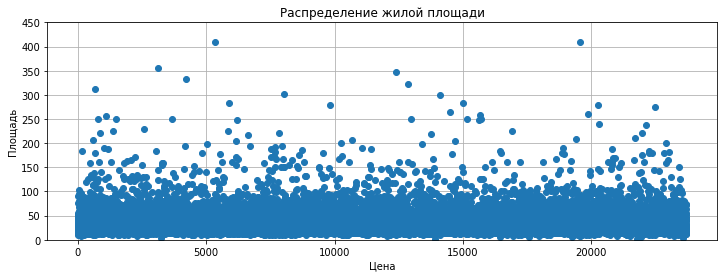

In [47]:
data['living_area'].describe().round(2)
data['living_area'].plot(
    ylim=(0, 450),
    style='o',
    grid=True,
    figsize=(12, 4),
)
plt.title('Распределение жилой площади')
plt.xlabel('Цена')
plt.ylabel('Площадь')
plt.show()

Диаграмма размаха


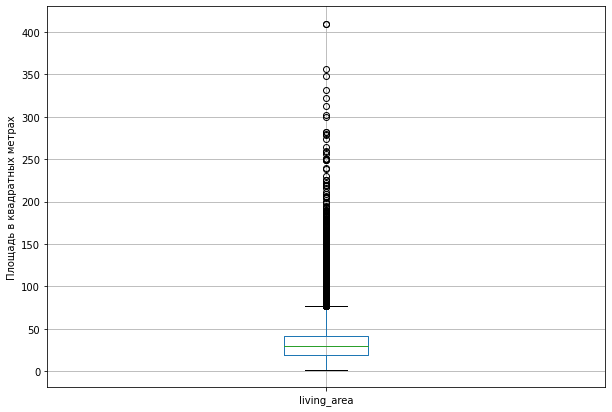

In [48]:
print('Диаграмма размаха')
data.boxplot(column=['living_area'], figsize=(10,7), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

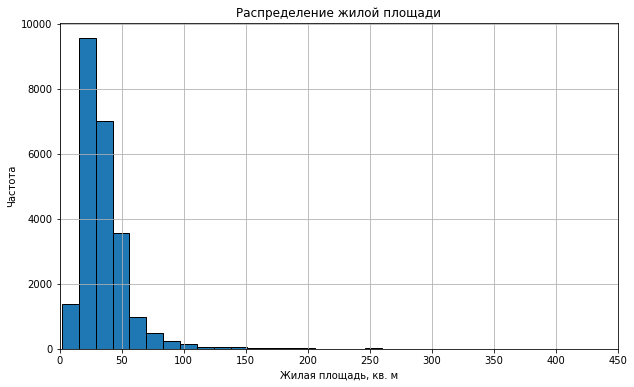

In [49]:
data['living_area'].plot(kind='hist', bins=30, edgecolor='black', figsize=(10, 6), xlim=(0, 450),)
plt.title('Распределение жилой площади')
plt.xlabel('Жилая площадь, кв. м')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Большая часть квартир имеет жилую площадь от 20 до 50 метров. Распределение схоже с общей площадью

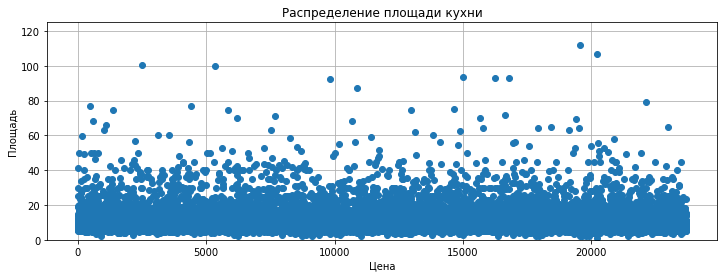

In [50]:
data['kitchen_area'].describe().round(2)
data['kitchen_area'].plot(
    ylim=(0, 125),
    style='o',
    grid=True,
    figsize=(12, 4),
)
plt.title('Распределение площади кухни')
plt.xlabel('Цена')
plt.ylabel('Площадь')
plt.show()

Диаграмма размаха


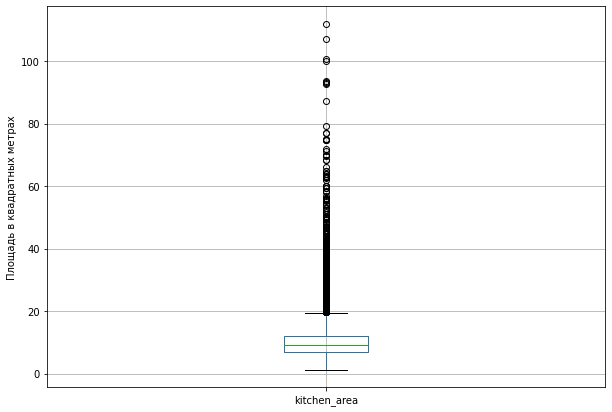

In [51]:
print('Диаграмма размаха')
data.boxplot(column=['kitchen_area'], figsize=(10,7), grid=True)
plt.ylabel('Площадь в квадратных метрах')
plt.show()

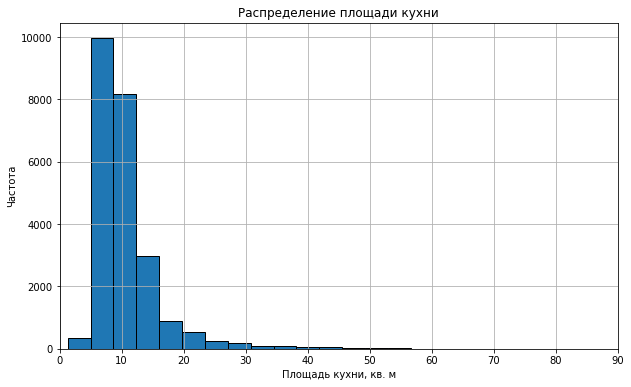

In [52]:
data['kitchen_area'].plot(kind='hist', bins=30, edgecolor='black', figsize=(10, 6), xlim=(0, 90),)
plt.title('Распределение площади кухни')
plt.xlabel('Площадь кухни, кв. м')
plt.ylabel('Частота')
plt.grid(True)
plt.show()

Большая часть квартир имеет площадь кухни от 5 до 17 метров. Распределение схоже с общей площадью

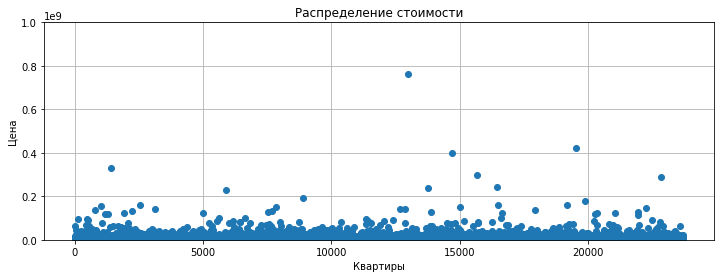

In [53]:
data['last_price'].describe().round(2)
data['last_price'].plot(
    ylim=(0, 1000000000),
    style='o',
    grid=True,
    figsize=(12, 4),
)
plt.title('Распределение стоимости')
plt.xlabel('Квартиры')
plt.ylabel('Цена')
plt.show()

Диаграмма размаха


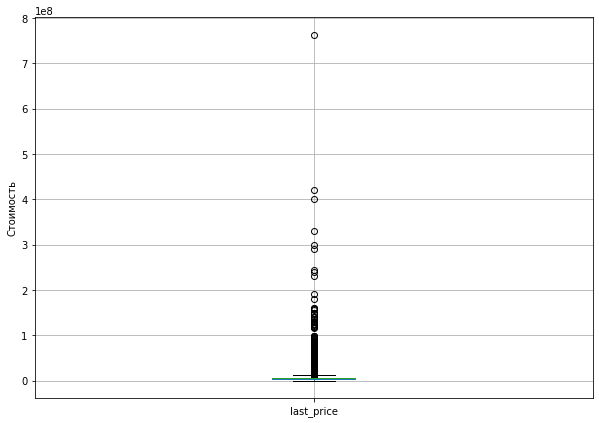

In [54]:
print('Диаграмма размаха')
data.boxplot(column=['last_price'], figsize=(10,7), grid=True)
plt.ylabel('Стоимость')
plt.show()

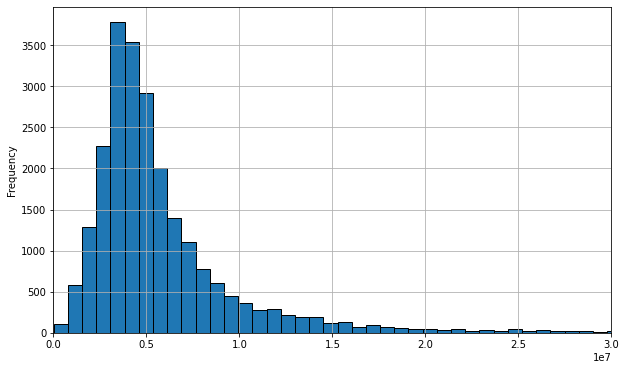

In [55]:
data['last_price'].plot(kind='hist', bins=1000, edgecolor='black', figsize=(10, 6), xlim=(0, 30000000),)
plt.grid(True)
plt.show()

In [56]:
data.nsmallest(5, 'last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,weekday_published,month_published,year_published,floor_type,city_centers_nearest_km
8793,7,12190,109.0,2019-03-20,2,2.8,25,32.0,25,NaN,...,805,0,<NA>,8,112,2,3,2019,последний,9
14911,5,430000,54.0,2018-06-26,2,2.6,3,30.5,3,NaN,...,<NA>,<NA>,<NA>,44,7963,1,6,2018,последний,60
17456,7,430000,30.4,2019-04-22,1,2.6,2,16.0,1,NaN,...,<NA>,<NA>,<NA>,<NA>,14145,0,4,2019,первый,156
16274,18,440000,40.0,2018-07-10,1,2.6,5,22.6,1,NaN,...,<NA>,<NA>,<NA>,45,11000,1,7,2018,первый,140
5698,7,450000,42.0,2017-07-31,2,2.6,1,23.0,1,NaN,...,<NA>,<NA>,<NA>,233,10714,0,7,2017,первый,139


In [57]:
data.nlargest(5, 'last_price')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,weekday_published,month_published,year_published,floor_type,city_centers_nearest_km
12971,19,763000000,400.0,2017-09-30,7,2.6,10,250.0,10,NaN,...,530,3,756,33,1907500,5,9,2017,последний,4
19540,8,420000000,900.0,2017-12-06,12,2.8,25,409.7,25,NaN,...,<NA>,2,318,106,466667,2,12,2017,последний,8
14706,15,401300000,401.0,2016-02-20,5,2.6,9,204.0,9,False,...,545,1,478,393,1000748,5,2,2016,последний,2
1436,19,330000000,190.0,2018-04-04,3,3.5,7,95.0,5,NaN,...,519,3,285,233,1736842,2,4,2018,другой,1
15651,20,300000000,618.0,2017-12-18,7,3.4,7,258.0,5,NaN,...,<NA>,2,198,111,485437,0,12,2017,другой,5


Максимальные значения не выглядят аномальными -  даже миллиард за большую квартиру премиального уровня возможен, а у нас в выборке жилье 400 метров за 736 млн. и так далее.
а минимальное значение, учитывая что это объект площадью 109 метров и находится в 9 км от центра нужно рассмотреть внимательнее. Вероятнее всего в стоимости указали количество тысяч, то есть это значение мы умножим на 1000. 

In [58]:
data.loc[8793, 'last_price'] = data.loc[8793, 'last_price'] * 1000
data.nsmallest(5, 'last_price')


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,weekday_published,month_published,year_published,floor_type,city_centers_nearest_km
14911,5,430000,54.0,2018-06-26,2,2.6,3,30.5,3,NaN,...,<NA>,<NA>,<NA>,44,7963,1,6,2018,последний,60
17456,7,430000,30.4,2019-04-22,1,2.6,2,16.0,1,NaN,...,<NA>,<NA>,<NA>,<NA>,14145,0,4,2019,первый,156
16274,18,440000,40.0,2018-07-10,1,2.6,5,22.6,1,NaN,...,<NA>,<NA>,<NA>,45,11000,1,7,2018,первый,140
5698,7,450000,42.0,2017-07-31,2,2.6,1,23.0,1,NaN,...,<NA>,<NA>,<NA>,233,10714,0,7,2017,первый,139
9581,7,450000,43.4,2018-08-31,2,2.6,5,30.3,3,NaN,...,<NA>,<NA>,<NA>,96,10369,4,8,2018,другой,140


Основной ценовой диапазон от 3 до 8 млн. Распределение нормальное, схоже с общей площадью

In [ ]:
print(len(data))
data['last_price'].describe().apply(lambda x: int(x))

23650


count        23650
mean       6541641
std       10896378
min         430000
25%        3400000
50%        4650000
75%        6799000
max      763000000
Name: last_price, dtype: int64

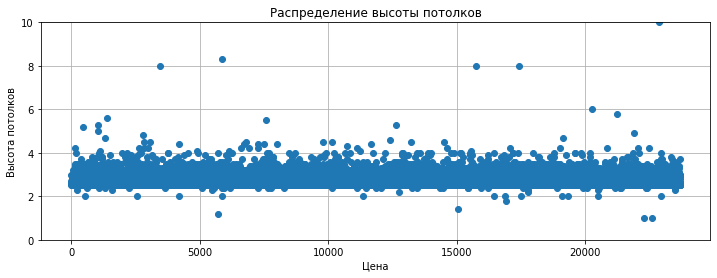

In [60]:
data['ceiling_height'].describe().round(2)
data['ceiling_height'].plot(
    ylim=(0, 10),
    style='o',
    grid=True,
    figsize=(12, 4),
)
plt.title('Распределение высоты потолков')
plt.xlabel('Цена')
plt.ylabel('Высота потолков')
plt.show()

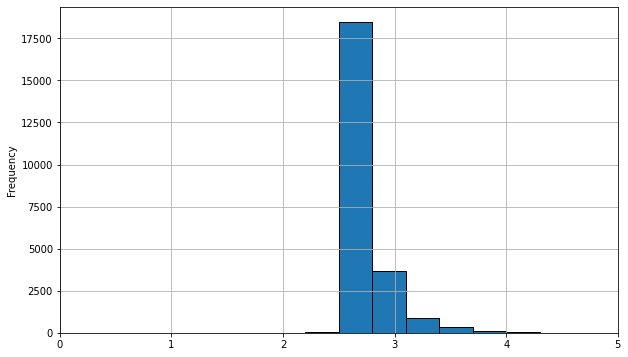

In [61]:
data['ceiling_height'].plot(kind='hist', bins=30, edgecolor='black', figsize=(10, 6), xlim=(0, 5),)
plt.grid(True)
plt.show()

Наиболее частые предложения с высотой потолков ~2.6 метрам

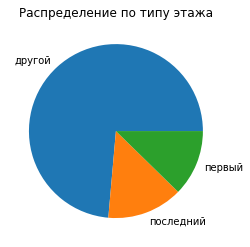

In [62]:
data['floor_type'].value_counts().plot(
    kind='pie',
    grid=True,
    figsize=(12, 4),
)
plt.title('Распределение по типу этажа')
plt.ylabel('')
plt.show()

Около 3/4 предложений не на первом и последнем этаже. Распределение очень нагляднопоказано на графике

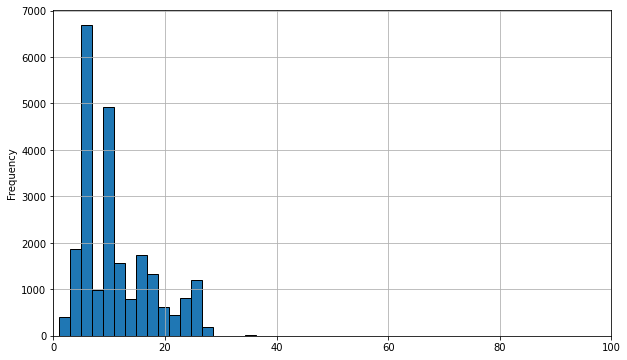

In [63]:
data['floors_total'].plot(kind='hist', bins=30, edgecolor='black', figsize=(10, 6), xlim=(0, 100),)
plt.grid(True)
plt.show()

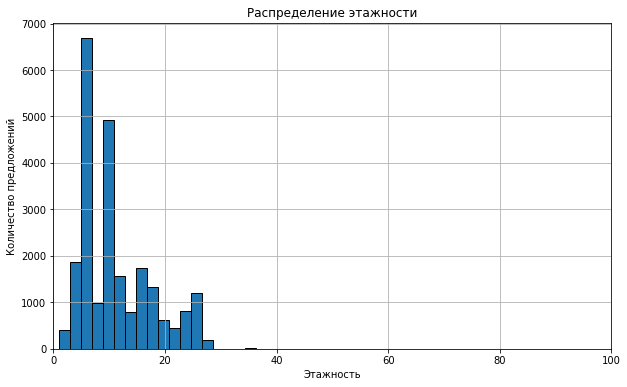

Предложений с этажностью до 2: 406
Предложений с этажностью от 2 до 5: 7635
Предложений с этажностью от 5 до 9: 5645
Предложений с этажностью от 9 и выше: 9879


In [64]:
import matplotlib.pyplot as plt

data['floors_total'].plot(kind='hist', bins=30, edgecolor='black', figsize=(10, 6), xlim=(0, 100))
plt.grid(True)
plt.xlabel('Этажность')
plt.ylabel('Количество предложений')
plt.title('Распределение этажности')
plt.show()

below_2 = data['floors_total'] <= 2
between_2_and_5 = (data['floors_total'] > 2) & (data['floors_total'] <= 5)
between_5_and_9 = (data['floors_total'] > 5) & (data['floors_total'] <= 9)
above_9 = data['floors_total'] > 9

below_2_count = len(data[below_2])
between_2_and_5_count = len(data[between_2_and_5])
between_5_and_9_count = len(data[between_5_and_9])
above_9_count = len(data[above_9])

print(f'Предложений с этажностью до 2: {below_2_count}')
print(f'Предложений с этажностью от 2 до 5: {between_2_and_5_count}')
print(f'Предложений с этажностью от 5 до 9: {between_5_and_9_count}')
print(f'Предложений с этажностью от 9 и выше: {above_9_count}')

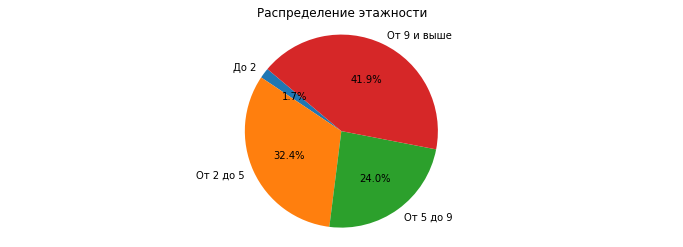

In [65]:
counts = [below_2_count, between_2_and_5_count, between_5_and_9_count, above_9_count]

labels = ['До 2', 'От 2 до 5', 'От 5 до 9', 'От 9 и выше']
plt.figure(figsize=(12, 4))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Распределение этажности')
plt.axis('equal') 
plt.show()

до 2х этажей это чаще всего частные дома - таких предложений меньше всего. Старый фонд (в СССР в основном строили 5 и 9 этажные дома) объединяет две категории занимает больше половины и почти 42% приходится на дома выше 9 этажей.

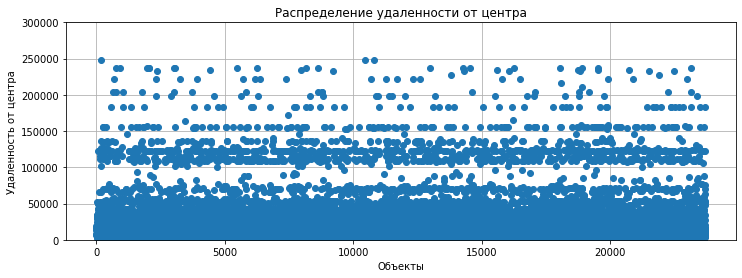

In [66]:
data['city_centers_nearest'].plot(
    ylim=(0, 300000),
    style='o',
    grid=True,
    figsize=(12, 4),
)
plt.title('Распределение удаленности от центра')
plt.xlabel('Объекты')
plt.ylabel('Удаленность от центра')
plt.show()

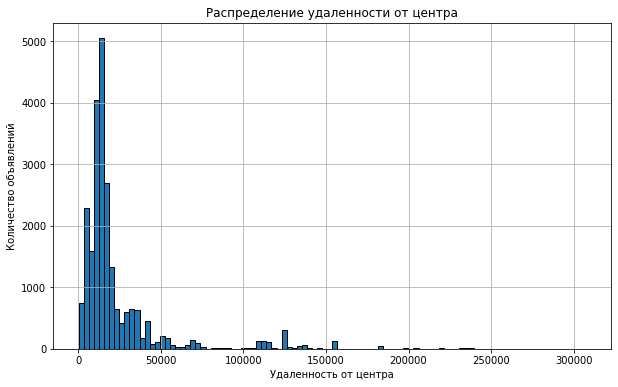

In [67]:
data['city_centers_nearest'].plot(kind='hist', bins=100, edgecolor='black', figsize=(10, 6))
plt.grid(True)
plt.title('Распределение удаленности от центра')
plt.xlabel('Удаленность от центра')
plt.ylabel('Количество объявлений')
plt.show()

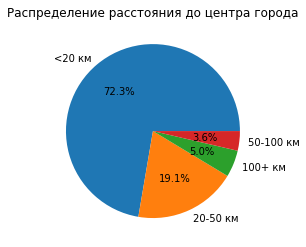

In [68]:
data['distance_category'] = pd.cut(data['city_centers_nearest'], bins=[0, 20000, 50000, 100000, float('inf')], labels=['<20 км', '20-50 км', '50-100 км', '100+ км'])

distance_counts = data['distance_category'].value_counts()
distance_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(12, 4))
plt.title('Распределение расстояния до центра города')
plt.ylabel('')
plt.show()

Учитывая, что Питер  с севера на юг 44 км, с запада на восток 25 км. можно сделать вывод что почти 73% объявлений, это сам город и его близлежащие районы (например Кудрово находится внутри КАД). Почти 20% это область в около 30км от КАД. 

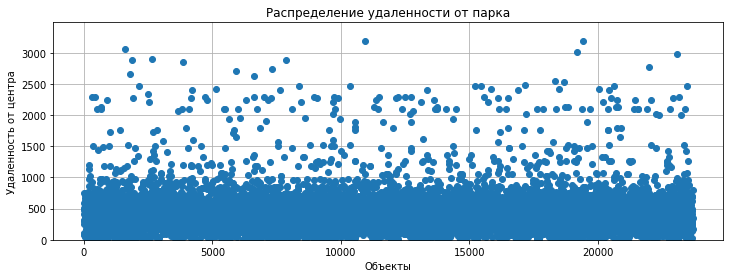

In [69]:
data['parks_nearest'].plot(
    ylim=(0, 3490),
    style='o',
    grid=True,
    figsize=(12, 4),
)
plt.title('Распределение удаленности от парка')
plt.xlabel('Объекты')
plt.ylabel('Удаленность от центра')
plt.show()

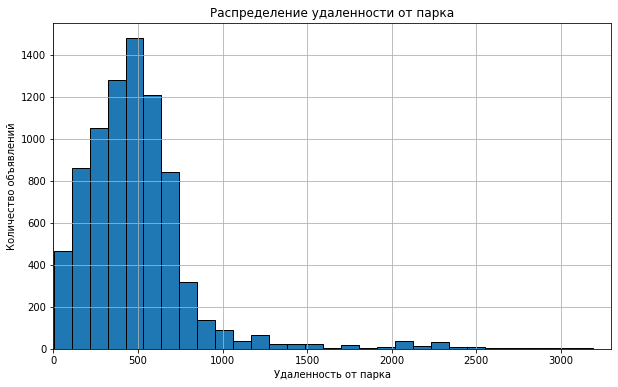

In [70]:
data['parks_nearest'].plot(kind='hist', bins=30, edgecolor='black', figsize=(10, 6), xlim=(0, 3300),)
plt.grid(True)
plt.title('Распределение удаленности от парка')
plt.xlabel('Удаленность от парка')
plt.ylabel('Количество объявлений')
plt.show()

В тех объявлениях, где указано наличие парков в радиусе 3км - наибольшее количество объектов располагается в диапазоне от 0 до 800 метров парка. 

Изучим вопрос: как быстро продавались квартиры 

In [71]:
data['days_exposition'].describe()

count       20470.0
mean       180.7532
std      219.777916
min             1.0
25%            45.0
50%            95.0
75%           231.0
max          1580.0
Name: days_exposition, dtype: Float64

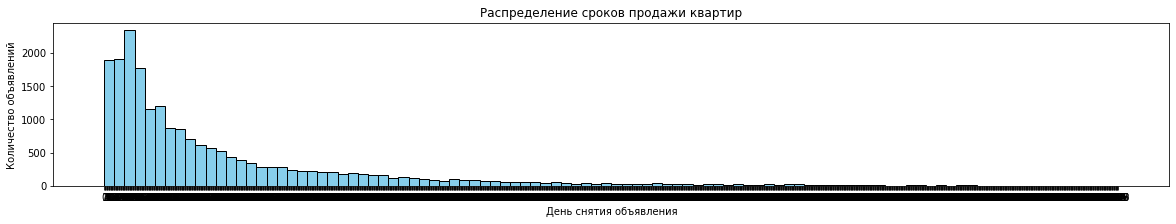

In [72]:
#построим гистограмму
plt.xticks(range(0, 1600, 1))
data['days_exposition'].plot(kind='hist', bins=100, color='skyblue', edgecolor='black', range=(0, 1600), figsize=(20, 3))
plt.title('Распределение сроков продажи квартир')
plt.xlabel('День снятия объявления')
plt.ylabel('Количество объявлений')
plt.show()

In [73]:
# посчитаем среднее и медиану
print(data['days_exposition'].mean())
print(data['days_exposition'].median())

180.7531998045921
95.0


мы уже рассматривали детально первые 100 дней и пришли к наблюдению, что есть пики по количеству снятых объявлений на 7, 30, 45, 60 (возможно и 75, но значения не так сильно выделяются) и 90 день. Возможно есть какое-то напоминание о том, что объявление размещено. После получения такого напоминания, даже если объект продан раньше, объявление чаще снимают в эти дни. Вторая гипотеза - после заявки на удаление фактически оно происходит не сразу, а в эти отсечки.

Даже по мнению риэлторов на самом деле оптимальным/средним временем продажи кваритиры считается период в три месяца (мы как раз получили медиану на этом уровне). Можно сделать вывод, что до 1.5 месяцев можно назвать быстрой реализацией, от 1.5 до 3 месяцев - нормальной, от 3 до 7 месяцев долгой, а свыше "очень" долгой реализацией.

#### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта.
Зависит ли цена от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23650 entries, 0 to 23698
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   total_images             23650 non-null  int64         
 1   last_price               23650 non-null  Int64         
 2   total_area               23650 non-null  float64       
 3   first_day_exposition     23650 non-null  datetime64[ns]
 4   rooms                    23650 non-null  int64         
 5   ceiling_height           23650 non-null  float64       
 6   floors_total             23565 non-null  Int64         
 7   living_area              23650 non-null  float64       
 8   floor                    23650 non-null  int64         
 9   is_apartment             2760 non-null   object        
 10  studio                   23650 non-null  bool          
 11  open_plan                23650 non-null  bool          
 12  kitchen_area             23650 non-nu

In [75]:
# для начала посмотрим на корреляцию
data[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'weekday_published', 'month_published', 'year_published', 'price_per_square_meter']].corr()

,last_price,total_area,living_area,kitchen_area,rooms,weekday_published,month_published,year_published,price_per_square_meter
last_price,1.000000,0.653809,0.585694,0.517176,0.363418,0.001592,0.002695,-0.042853,0.736470
total_area,0.653809,1.000000,0.945844,0.662192,0.758744,-0.004649,0.004923,-0.079496,0.302201
living_area,0.585694,0.945844,1.000000,0.505016,0.827980,-0.004198,-0.000309,-0.071970,0.232396
kitchen_area,0.517176,0.662192,0.505016,1.000000,0.327797,-0.003429,0.002950,-0.059443,0.382830
rooms,0.363418,0.758744,0.827980,0.327797,1.000000,-0.004316,-0.004388,-0.054641,0.055471
weekday_published,0.001592,-0.004649,-0.004198,-0.003429,-0.004316,1.000000,0.011354,-0.003844,-0.007141
month_published,0.002695,0.004923,-0.000309,0.002950,-0.004388,0.011354,1.000000,-0.271176,-0.001978
year_published,-0.042853,-0.079496,-0.071970,-0.059443,-0.054641,-0.003844,-0.271176,1.000000,0.008894
price_per_square_meter,0.736470,0.302201,0.232396,0.382830,0.055471,-0.007141,-0.001978,0.008894,1.000000


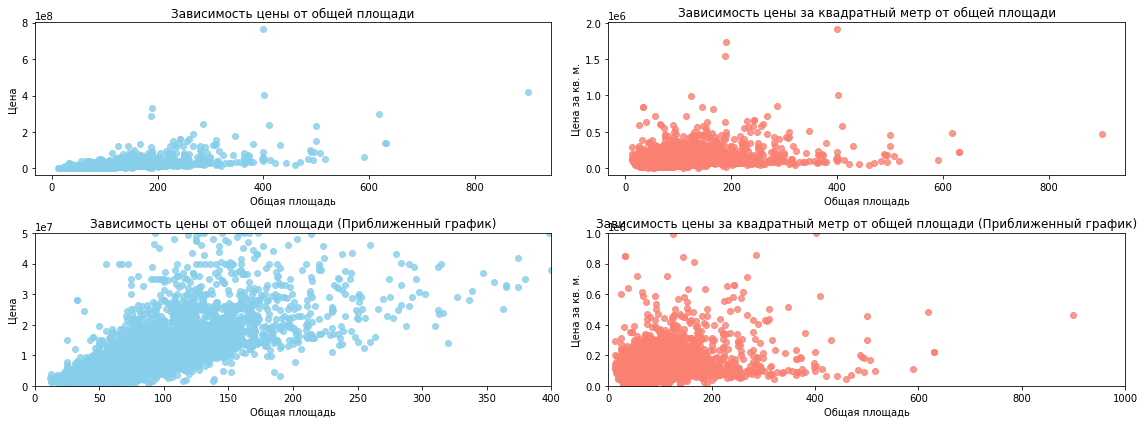

In [76]:
#изучим зависимость цен от общей площади
fig, axs = plt.subplots(2, 2, figsize=(16, 6))

axs[0, 0].scatter(data['total_area'], data['last_price'], color='skyblue', alpha=0.8)
axs[0, 0].set_xlabel('Общая площадь')
axs[0, 0].set_ylabel('Цена')
axs[0, 0].set_title('Зависимость цены от общей площади')


axs[0, 1].scatter(data['total_area'], data['price_per_square_meter'], color='salmon', alpha=0.8)
axs[0, 1].set_xlabel('Общая площадь')
axs[0, 1].set_ylabel('Цена за кв. м.')
axs[0, 1].set_title('Зависимость цены за квадратный метр от общей площади')

axs[1, 0].scatter(data['total_area'], data['last_price'], color='skyblue', alpha=0.8)
axs[1, 0].set_xlabel('Общая площадь')
axs[1, 0].set_ylabel('Цена')
axs[1, 0].set_title('Зависимость цены от общей площади (Приближенный график)')
axs[1, 0].set_xlim(0, 400)
axs[1, 0].set_ylim(0, 50000000)

axs[1, 1].scatter(data['total_area'], data['price_per_square_meter'], color='salmon', alpha=0.8)
axs[1, 1].set_xlabel('Общая площадь')
axs[1, 1].set_ylabel('Цена за кв. м.')
axs[1, 1].set_title('Зависимость цены за квадратный метр от общей площади (Приближенный график)')
axs[1, 1].set_xlim(0, 1000)
axs[1, 1].set_ylim(0, 1000000)

plt.tight_layout()
plt.show()

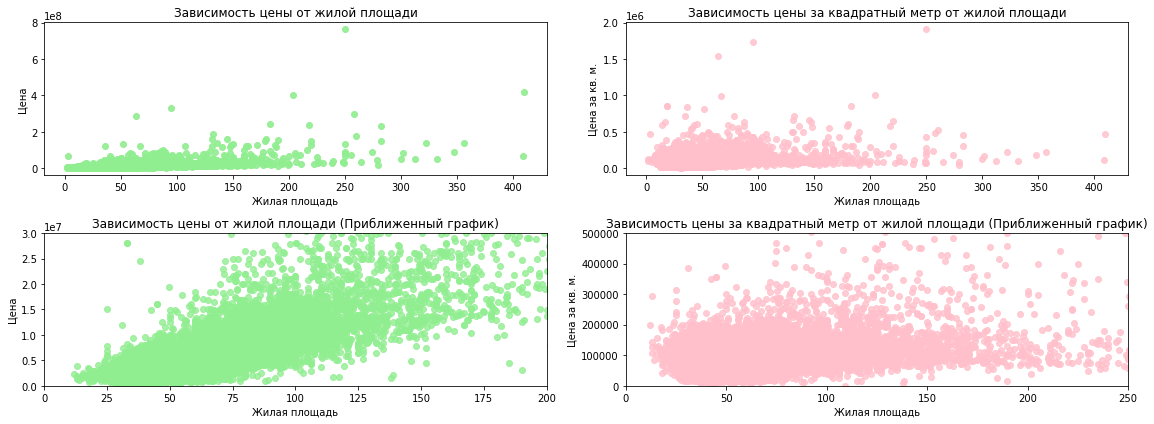

In [77]:
#изучим зависимость цен от жилой площади
fig, axs = plt.subplots(2, 2, figsize=(16, 6))

axs[0, 0].scatter(data['living_area'], data['last_price'], color='lightgreen', alpha=0.9)
axs[0, 0].set_xlabel('Жилая площадь')
axs[0, 0].set_ylabel('Цена')
axs[0, 0].set_title('Зависимость цены от жилой площади')


axs[0, 1].scatter(data['living_area'], data['price_per_square_meter'], color='pink', alpha=0.8)
axs[0, 1].set_xlabel('Жилая площадь')
axs[0, 1].set_ylabel('Цена за кв. м.')
axs[0, 1].set_title('Зависимость цены за квадратный метр от жилой площади')

axs[1, 0].scatter(data['total_area'], data['last_price'], color='lightgreen', alpha=0.8)
axs[1, 0].set_xlabel('Жилая площадь')
axs[1, 0].set_ylabel('Цена')
axs[1, 0].set_title('Зависимость цены от жилой площади (Приближенный график)')
axs[1, 0].set_xlim(0, 200)
axs[1, 0].set_ylim(0, 30000000)

axs[1, 1].scatter(data['total_area'], data['price_per_square_meter'], color='pink', alpha=0.8)
axs[1, 1].set_xlabel('Жилая площадь')
axs[1, 1].set_ylabel('Цена за кв. м.')
axs[1, 1].set_title('Зависимость цены за квадратный метр от жилой площади (Приближенный график)')
axs[1, 1].set_xlim(0, 250)
axs[1, 1].set_ylim(0, 500000)

plt.tight_layout()
plt.show()

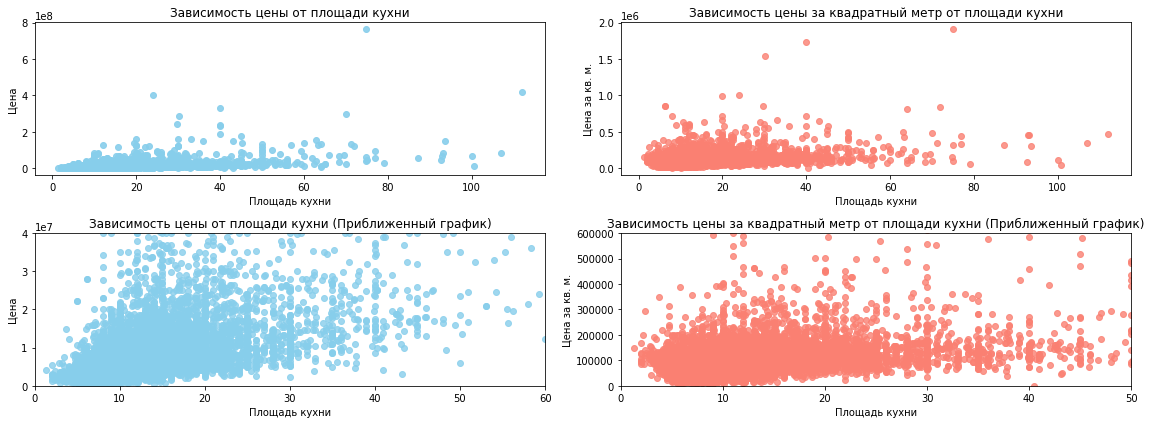

In [78]:
#изучим зависимость цен от площади кухни
fig, axs = plt.subplots(2, 2, figsize=(16, 6))

axs[0, 0].scatter(data['kitchen_area'], data['last_price'], color='skyblue', alpha=0.9)
axs[0, 0].set_xlabel('Площадь кухни')
axs[0, 0].set_ylabel('Цена')
axs[0, 0].set_title('Зависимость цены от площади кухни')


axs[0, 1].scatter(data['kitchen_area'], data['price_per_square_meter'], color='salmon', alpha=0.8)
axs[0, 1].set_xlabel('Площадь кухни')
axs[0, 1].set_ylabel('Цена за кв. м.')
axs[0, 1].set_title('Зависимость цены за квадратный метр от площади кухни')

axs[1, 0].scatter(data['kitchen_area'], data['last_price'], color='skyblue', alpha=0.8)
axs[1, 0].set_xlabel('Площадь кухни')
axs[1, 0].set_ylabel('Цена')
axs[1, 0].set_title('Зависимость цены от площади кухни (Приближенный график)')
axs[1, 0].set_xlim(0, 60)
axs[1, 0].set_ylim(0, 40000000)

axs[1, 1].scatter(data['kitchen_area'], data['price_per_square_meter'], color='salmon', alpha=0.8)
axs[1, 1].set_xlabel('Площадь кухни')
axs[1, 1].set_ylabel('Цена за кв. м.')
axs[1, 1].set_title('Зависимость цены за квадратный метр от площади кухни (Приближенный график)')
axs[1, 1].set_xlim(0, 50)
axs[1, 1].set_ylim(0, 600000)

plt.tight_layout()
plt.show()

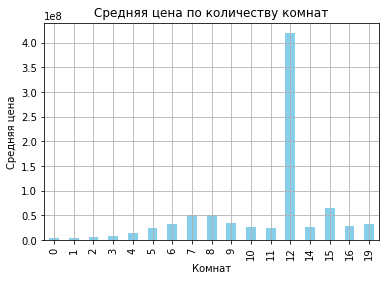

<AxesSubplot:>

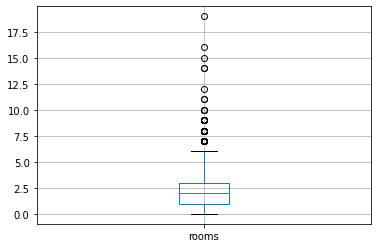

In [79]:
#изучим зависимость цен от количества комнат

mean_price_by_floor_type = data.groupby('rooms')['last_price'].mean()

plt.figure(figsize=(6, 4))
mean_price_by_floor_type.plot(kind='bar', color='skyblue')
plt.xlabel('Комнат')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по количеству комнат')
plt.grid(True)
plt.show()

data.boxplot(column='rooms')

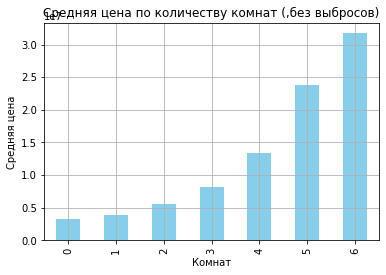

In [80]:
#изучим зависимость цен от количества комнат без выбросов

mean_price_by_floor_type = data.query('rooms < 7').groupby('rooms')['last_price'].mean()

plt.figure(figsize=(6, 4))
mean_price_by_floor_type.plot(kind='bar', color='skyblue')
plt.xlabel('Комнат')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по количеству комнат (,без выбросов)')
plt.grid(True)
plt.show()

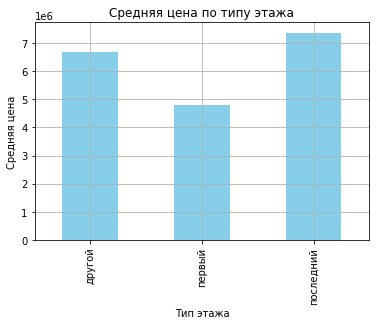

In [81]:
#изучим зависимость цен от типа этажа

mean_price_by_floor_type = data.groupby('floor_type')['last_price'].mean()


plt.figure(figsize=(6, 4))
mean_price_by_floor_type.plot(kind='bar', color='skyblue')
plt.xlabel('Тип этажа')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по типу этажа')
plt.grid(True)
plt.show()

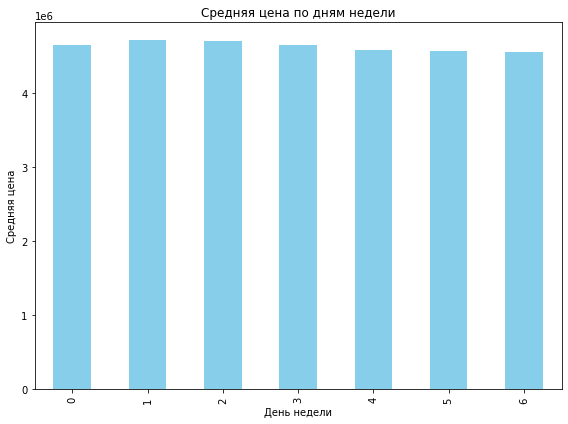

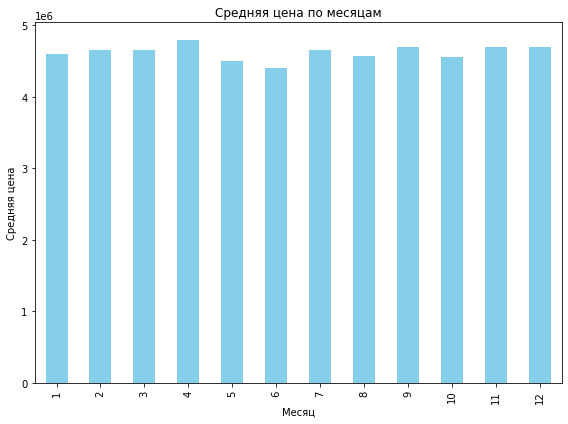

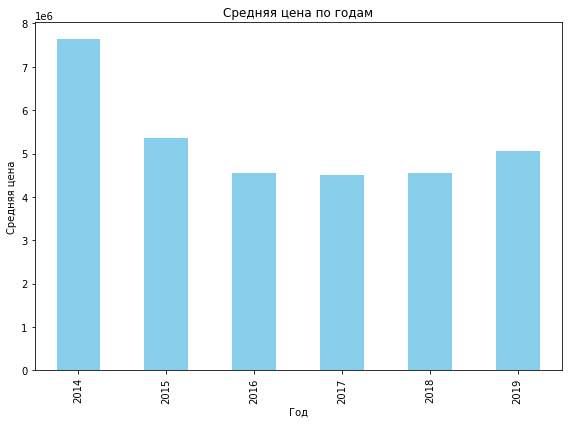

In [82]:
# Создаем график зависимости цен от дня недели
plt.figure(figsize=(8, 6))
data.groupby(data['weekday_published'])['last_price'].median().plot(kind='bar', color='skyblue')
plt.xlabel('День недели')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по дням недели')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
data.groupby(data['month_published'])['last_price'].median().plot(kind='bar', color='skyblue')
plt.xlabel('Месяц')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по месяцам')
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
data.groupby(data['year_published'])['last_price'].median().plot(kind='bar', color='skyblue')
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по годам')
plt.tight_layout()
plt.show()


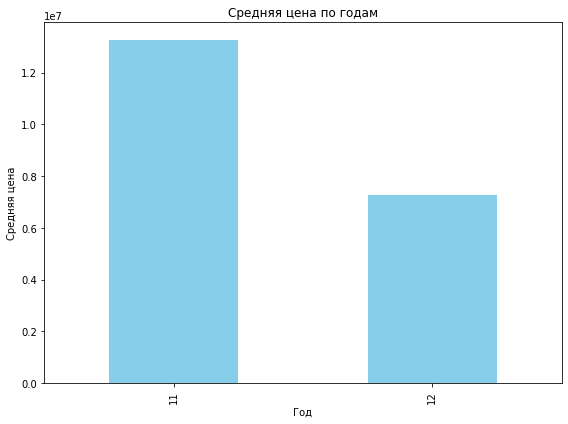

In [83]:
# посмотрим на 14 год повнимательнее

plt.figure(figsize=(8, 6))
data.query('year_published == 2014').groupby(data['month_published'])['last_price'].median().plot(kind='bar', color='skyblue')
plt.xlabel('Год')
plt.ylabel('Средняя цена')
plt.title('Средняя цена по годам')
plt.tight_layout()
plt.show()

Теперь разберем каждый из пунктов.
1. Начнем с последних: день недели, месяц и год не показывают зависимости - все отклонения можно обьяснить. По дням недели нет никакой зависимости. По месязам так же. По годам сильно выбился 14 год, после более внимательного изучения замечаем, что у нас всего два месяца и вспоминаем события, в результате которых рубль ослабел, и население скупало все подряд с целью уйти от денег к материальным ценностям, исторически сложилось что цены на жилье в России пересчитывали в доллары. Рост цен был приблизительно сопоставим с ростом курса доллара. Когда деньги кончились цены стабилизировались, а в 19 году начали действовать расширенные программы ипотек от госудасрства и от банков, что снова привело к увеличению спроса и немного подняло цены.
2. Прослеживается зависимость цен от этажа - последние этажи дороже всего (наверно из-за ассоциаций с "пентхаусами", с отсутствием соседей сверху, и тд.), после идут все остальные этажи. Первые этажи дешевле всего, вероятно так как число ограблений на первых этажах больше всего, больше всего шума, меньше света (если застройка плотная).
3. По количеству комнат цена растет как раз до границы значений с выбросами то есть до 6-7 комнат. Далее такая зависимость не прослеживается. Возможно, большинство многокомнатных помещений это бывшие коммунальные квартиры отсюда и цены ниже.
4. И сюда же 5 и 6 площади кухни жилая и общая напрямую связаны с изменением цены. Все логично - больше жилье больше цена. Ну и не может в маленькой квартире быть огромной кухни. Так что взаимосвязь видим и подтверждаем, все логично.

Все вышеуказанные выводы по "численным" столбцам можно было сделать из таблицы корреляции, далее на графиках мы наши подтверждение.

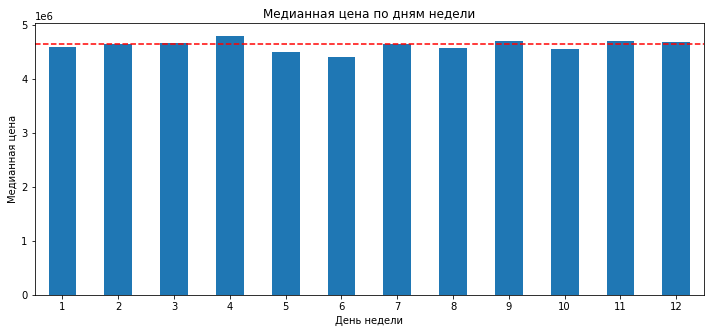

In [ ]:
fig, ax = plt.subplots()

ax = data.groupby('month_published')['last_price'].median()\
    .plot(kind = 'bar', rot = 0, xlabel = 'День недели', ylabel = 'Медианная цена',
         figsize = (12, 5))
ax.axhline(data['last_price'].median(), color = "red", linestyle = 'dashed') # Линия общей медианной цены
plt.title('Медианная цена по дням недели')
plt.show()

#### задание 4
Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [85]:
top_localities = data['locality_name'].sort_values().value_counts().head(10)
top_localities_list = top_localities.index.tolist()
top_localities_list

['санкт-петербург',
 'посёлок мурино',
 'посёлок шушары',
 'всеволожск',
 'пушкин',
 'колпино',
 'посёлок парголово',
 'гатчина',
 'деревня кудрово',
 'выборг']

In [86]:
filtered_data = data[data['locality_name'].isin(top_localities_list)]
mean_price_per_sqm = filtered_data.groupby('locality_name')['price_per_square_meter'].mean()
mean_price_per_sqm

locality_name
всеволожск            68654.474874
выборг                58141.919831
гатчина               68746.110749
деревня кудрово       92473.588629
колпино               75424.571006
посёлок мурино         85681.76259
посёлок парголово      90175.88685
посёлок шушары        78677.379545
пушкин               103125.818428
санкт-петербург      114849.005916
Name: price_per_square_meter, dtype: Float64

In [87]:
pivot_table = pd.pivot_table(filtered_data, 
                              index='locality_name', 
                              values=['price_per_square_meter'], 
                              aggfunc={'price_per_square_meter': 'mean', 'locality_name': 'count'})
pivot_table.columns = ['ads_number', 'mean_price_per_sqm']
pivot_table['mean_price_per_sqm'] = pivot_table['mean_price_per_sqm'].astype(int)
pivot_table

,ads_number,mean_price_per_sqm
locality_name,,
всеволожск,398,68654
выборг,237,58141
гатчина,307,68746
деревня кудрово,299,92473
колпино,338,75424
посёлок мурино,556,85681
посёлок парголово,327,90175
посёлок шушары,440,78677
пушкин,369,103125


Ничего удивительного - самый дорогой квадратный метр в северной столице и в городе-парке Пушкин. В Выборге цены вдвое ниже чем в топ 2х городах.

#### задание 5

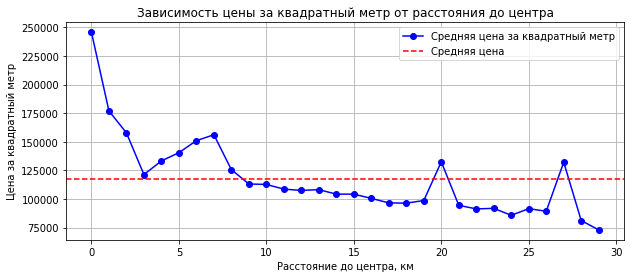

In [88]:
north_star_data = data.loc[data['locality_name'] == 'санкт-петербург']
mean_price_per_sqm = north_star_data.groupby('city_centers_nearest_km')['price_per_square_meter'].mean()

# Построение графика
plt.figure(figsize=(10, 4))
mean_price_per_sqm.plot(kind='line', marker='o', color='blue', label='Средняя цена за квадратный метр')

# Вычисление и добавление средней линии
mean_price = mean_price_per_sqm.mean()
plt.axhline(mean_price, color='red', linestyle='--', label='Средняя цена')
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Цена за квадратный метр')
plt.title('Зависимость цены за квадратный метр от расстояния до центра')
plt.legend()
plt.grid(True)
plt.show()

Самые высокие цены в центре и идет резкое снижение до уровня удаленности в 4км. далее снова идет увеличение стоимости до 8 км, так как помимо центра есть еще так назваемые престижные районы (Петроград например), на расстоянии 20км и 27км так же могут располагаться дорогие районы (например Петергоф, Красное Село). Далее идет постепенное снижение цен. Важно отметить - неизвестно какая точка была взята за центр, а город это не геометрически правильный круг.
Также необходимо учесть, возможно город Санкт-Петербург не всегда означет, что объект находится в административных границах Кудрово и Заневку часто в обиходе называют районами, но это отдельные населенные пункты, а те кто размещал объявление могли указать город Санкт-Петербург потому, что привыкли. 

In [89]:
data_filtered_27 = data.loc[data['locality_name'] == 'санкт-петербург']
data_filtered_27 = data_filtered_27[data_filtered_27['city_centers_nearest_km'] == 27]
data_filtered_27['price_per_square_meter'].mean()

132115.5

In [90]:
data_filtered_27.sort_values(by='price_per_square_meter').tail(10)


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,weekday_published,month_published,year_published,floor_type,city_centers_nearest_km,distance_category
5961,6,2250000,32.0,2018-02-27,1,2.6,2,16.5,2,NaN,...,0,<NA>,178,70312,1,2,2018,последний,27,20-50 км
748,13,14350000,74.0,2017-11-28,2,3.1,5,30.0,3,NaN,...,0,<NA>,128,193919,1,11,2017,другой,27,20-50 км


Выброс средней цены на 27км связан с тем, что всего два объекта в этом разделе выборки и один из них стоит 14 млн. Сделать однозначный вывод, что была допущена ошибка в цене на один порядок, нельзя так как это может быть реальной стоимостью объекта (обстановка с драгоценными металлами и камнями, антиквариатом например).
С другой стороны мы можем считать это выбросом, который не влияет на общую тенденцию снижения цены с увеличением удаленности.


In [91]:
data_filtered_20 = data.loc[data['locality_name'] == 'санкт-петербург']
data_filtered_20 = data_filtered_20[data_filtered_20['city_centers_nearest_km'] == 20]
data_filtered_20['price_per_square_meter'].mean()

132513.08181818182

In [92]:
data_filtered_20.sort_values(by='price_per_square_meter').tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around,ponds_nearest,days_exposition,price_per_square_meter,weekday_published,month_published,year_published,floor_type,city_centers_nearest_km,distance_category
10220,15,22100000,89.1,2017-06-11,2,2.6,10,50.3,6,NaN,...,<NA>,<NA>,403,248036,6,6,2017,другой,20,<20 км
19130,11,40000000,153.0,2017-09-02,3,3.3,10,45.2,7,NaN,...,<NA>,<NA>,455,261438,5,9,2017,другой,20,<20 км
21881,15,44500000,169.0,2019-02-28,3,3.3,9,101.0,7,NaN,...,<NA>,<NA>,<NA>,263314,3,2,2019,другой,20,<20 км
17791,9,23999088,90.0,2017-02-16,2,3.1,8,35.9,5,NaN,...,<NA>,<NA>,457,266657,3,2,2017,другой,20,<20 км
1336,12,18500000,66.0,2017-06-08,1,3.0,7,25.0,7,NaN,...,<NA>,<NA>,130,280303,3,6,2017,последний,20,<20 км
18315,14,36000000,127.6,2019-01-22,3,3.2,9,63.7,5,NaN,...,<NA>,<NA>,<NA>,282132,1,1,2019,другой,20,<20 км
21955,19,130000000,431.0,2017-10-02,7,3.7,8,220.0,5,NaN,...,<NA>,<NA>,161,301624,0,10,2017,другой,20,<20 км
16247,5,38000000,109.0,2017-08-26,2,2.6,8,61.6,4,NaN,...,<NA>,<NA>,34,348624,5,8,2017,другой,20,<20 км
14944,9,39000000,91.0,2016-05-05,2,2.6,8,44.0,3,NaN,...,<NA>,<NA>,626,428571,3,5,2016,другой,20,<20 км
19267,20,74000000,153.6,2019-04-29,3,3.3,8,56.0,6,NaN,...,<NA>,<NA>,<NA>,481771,0,4,2019,другой,20,<20 км


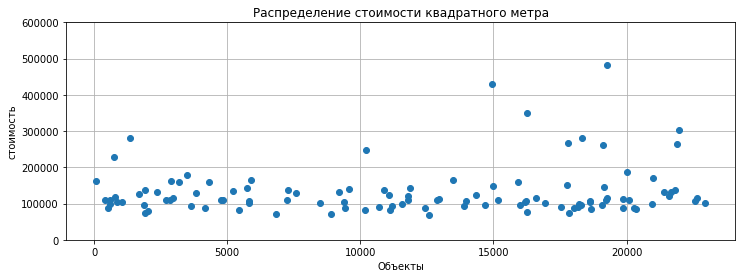

In [93]:
data_filtered_20['price_per_square_meter'].plot(
    ylim=(0, 600000),
    style='o',
    grid=True,
    figsize=(12, 4),
)
plt.title('Распределение стоимости квадратного метра')
plt.xlabel('Объекты')
plt.ylabel('стоимость')
plt.show()

Диаграмма размаха


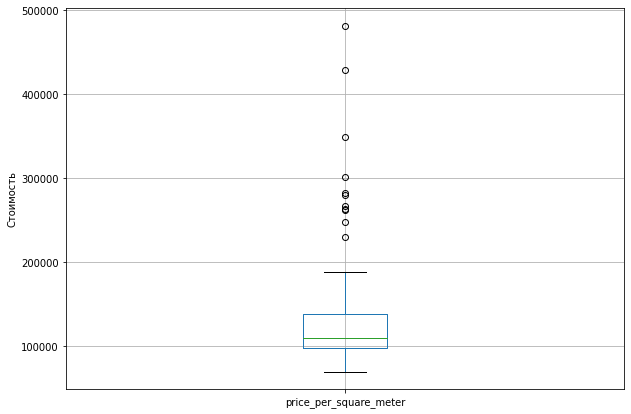

In [94]:
print('Диаграмма размаха')
data_filtered_20.boxplot(column=['price_per_square_meter'], figsize=(10,7), grid=True)
plt.ylabel('Стоимость')
plt.show()

In [95]:
data_filtered_20_below_190k = data_filtered_20[data_filtered_20['price_per_square_meter'] < 190000]
data_filtered_20_below_190k['price_per_square_meter'].mean()

112971.26262626263

Какой-то дополнительной информации из детального изучения объектов на удалении 20км не получено.
Сохраняю версию с престижными районами.

### Напишите общий вывод

Исследование объявлений о продаже квартир

Необходимо оценить данные о продаже квартир в Ленинградской области, выявить факторы влияющие на стоимость, установить взаимосвязи между параметрами и ценой. Подробно детали объясняютс в каждом пункте исследования

описание данных:
- Набор данных из 23699 строк и 22 столбцов
- Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Данные были изучены.
Проанализированы пропуски, там где это возможно были добавлены значения (медианные/средние, из внешних источников, нули). Обработаны дубликаты, переименованы столбцы.
В таблицу были добавлены необходимые для решения задач дополнительные столбцы, были выполнены рассчеты для их заполнения.
Произведена визуализация взаимосвязи предложенных в задаче параметров
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего парка
с ценами на объекты. 

Большая часть квартир имеет площадь от 25 до 75 метров, жилую площадь от 20 до 50 метров, площадь кухни от 5 до 17 метров и основной ценовой диапазон от 3 до 8 млн. Наиболее частые предложения с высотой потолков ~2.6 метрам и около 3/4 предложений не на первом и последнем этаже, при этом этажность зданый разделилась на 42% больше 9 этажей, 32% от 2 до 5, 24% от 5 до 9 - до 2х этажей (всего 1.7%) это чаще всего частные дома - таких предложений меньше всего. Старый фонд (в СССР в основном строили 5 и 9 этажные дома) объединяет две категории занимает 56% и почти 42% приходится на дома выше 9 этажей.
Учитывая, что Питер с севера на юг 44 км, с запада на восток 25 км. можно сделать вывод что почти 73% объявлений, это сам город и его близлежащие районы (например Кудрово находится внутри КАД). Почти 20% это область в около 30км от КАД. В тех объявлениях, где указано наличие парков в радиусе 3км - наибольшее количество объектов располагается в диапазоне от 0 до 800 метров до парка. 

По срокам размещения объявлений есть пики по количеству снятых объявлений на 7, 30, 45, 60 (возможно и 75, но значения не так сильно выделяются) и 90 день. Возможно есть какое-то напоминание о том, что объявление размещено. После получения такого напоминания, даже если объект продан раньше, объявление чаще снимают в эти дни. Вторая гипотеза - после заявки на удаление фактически оно происходит не сразу, а в эти отсечки.
Даже по мнению риэлторов на самом деле оптимальным/средним временем продажи кваритиры считается период в три месяца (мы как раз получили медиану на этом уровне). Можно сделать вывод, что до 1.5 месяцев можно назвать быстрой реализацией, от 1.5 до 3 месяцев - нормальной, от 3 до 7 месяцев долгой, а свыше "очень" долгой реализацией.

Далее рассмотрим изученные зависимости:
- Начнем с последних: день недели, месяц и год не показывают зависимости - все отклонения можно обьяснить. По дням недели нет никакой зависимости. По месяцам так же. По годам сильно выбился 14 год, после более внимательного изучения замечаем, что у нас всего два месяца и вспоминаем события, в результате которых рубль ослабел, и население скупало все подряд с целью уйти от денег к материальным ценностям, исторически сложилось что цены на жилье в России пересчитывали в доллары. Рост цен был приблизительно сопоставим с ростом курса доллара. Когда деньги кончились цены стабилизировались, а в 19 году начали действовать расширенные программы ипотек от госудасрства и от банков, что снова привело к увеличению спроса и немного подняло цены.
- Прослеживается зависимость цен от этажа - последние этажи дороже всего (наверно из-за ассоциаций с "пентхаусами", с отсутствием соседей сверху, больше света и тд.), после идут все остальные этажи. Первые этажи дешевле всего, вероятно так как число ограблений на первых этажах больше всего (32% квартирных преступлений приходится на первые этажи. Для сравнения на этажи выше десятого приходится лишь 1.2%), больше всего шума, меньше света (если застройка плотная).
- По количеству комнат цена растет как раз до границы значений с выбросами то есть до 6-7 комнат. Далее такая зависимость не прослеживается. Возможно, большинство многокомнатных помещений это бывшие коммунальные квартиры отсюда и цены ниже.
- Площади кухни жилая и общая напрямую связаны с изменением цены. Все логично - больше жилье больше цена. Ну и не может в маленькой квартире быть огромной кухни. Так что взаимосвязь видим и подтверждаем, все логично.
- Самый дорогой квадратный метр в северной столице и в городе-парке Пушкин. В Выборге цены вдвое ниже чем в топ 2х городах.
- В самой северной столице самые высокие цены в центре и идет резкое снижение до уровня удаленности в 4км. далее снова идет увеличение стоимости до 8 км, так как помимо центра есть еще так назваемые престижные районы (Петроград например), на расстоянии 20км (выброс на удаленности 27км связан с очень маленьким количеством объектов, что искажает тенденцию на графике) так же могут располагаться дорогие районы (например Петергоф, Красное Село). Далее идет постепенное снижение цен.


Для улучшения качества данных можно порекомендовать 
- сделать некоторые поля (те по которым установлена взаимосвязь с ценой, и которые требуются для анализа/исследования) обязательными к заполнению.
- для предотвращения неявных дубликатов в названиях населенных пунктов можно сделать свой список и предлагать пользователям выбор "дропдаун" с умным поиском по вводимой информации "_начните вводить населенный пункт_", но при этом оставить возможность ввести свой адрес. 
- установить ограничения по максимальным значениям, которые вводят при указании высоты потолков.
- оптимизировать техническое решение, которое загружает данные из внешних источников - ввеси проверку на пропуски и перенастроить решение так, чтобы эти пропуски минимизировать.
- по флагу апартаменты - пока нет законодательно закрепленного определения, можно предложить изменить формулировку самого флага. Сейчас по закону апар это "_коммерческая или жилая_", так будет более понятно пользователям при размещении объявлений.
